# <center>A simple random forest approach predicting fish survival</center> #
<center><img src = "jup.png" style="height: 50px;"/> + <img src = "salmon.jpg" style="height: 50px;"/> + <img src="rf.png" style="height: 50px;"/></center>
<center>(only 13 lines of code!)</center>

### Import Necessary Python Packages (Pandas, NumPy, Scikit-learn)

In [6]:
import pandas as pd
import numpy as np

from IPython.display import Image

import matplotlib.pyplot as plt

from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

%matplotlib inline

### Import CSV from Exported from Snowflake

In [25]:
fish = pd.read_csv('fish_predict.csv')
fish.head()

,TAG_CODE,CAPTURE_CODE,MARCH_FLAG,APR_FLAG,MAY_FLAG,JUNE_FLAG,JULY_FLAG,AUGUST_FLAG,SEP_FLAG,SOCKEYE_FLAG,HATCHERY_REARED,SS_FLAG,LENGTH_MM
0,3DD.003C09978A,1,0,0,0,0,0,0,1,1,1,1,102
1,3DD.003C099940,1,0,0,0,0,0,0,1,1,1,1,97
2,3DD.003C099A9D,1,0,0,0,0,0,0,1,1,1,1,101
3,3DD.003C099525,1,0,0,0,0,0,0,1,1,1,1,99
4,3DD.003C099531,1,0,0,0,0,0,0,1,1,1,1,87


### Split fish records into Training vs. Test groups, then Y (predicted) vs X (predictors)

We will develop a model on the "training" group, then validate it's performance against new data through a test group. In our example, 70% of data will be randomly selected in our training group; the remaining 30% is our test group.

<center><img src="traintest.png" style="width: 300px;"/><center>

In [8]:
samp = np.random.rand(len(fish)) < 0.7
y_fish = fish['CAPTURE_CODE']
x_fish = fish[['SOCKEYE_FLAG','HATCHERY_REARED','SS_FLAG','LENGTH_MM','MARCH_FLAG',\
               'APR_FLAG', 'MAY_FLAG','JUNE_FLAG', 'JULY_FLAG', 'AUGUST_FLAG', 'SEP_FLAG']]
y_train, x_train = y_fish[samp], x_fish[samp]
y_test, x_test = y_fish[~samp], x_fish[~samp]

### Train Random Forest Classifier, Predict on Test Group

A **random forest** is a **machine learning algorithm** that generates a large number of **decision trees**, then isolates *which* variables are best at predicting the target outcome.

<center><img src="rf-eg.png" style="height: 375px;"/></center>

1st, we fit the model to the **training** group, then we predict on the **test** group to see how we did!

Why do we do this? Computers are smart, they can memorize every intricacy of the training group (this is called *overfitting*), but we want to know how the model will do with data it has never seen to see how *generalizable* it is.

In [9]:
rfc = RandomForestClassifier(100).fit(x_train,y_train)
y_predict,y_predict_proba = rfc.predict(x_test),rfc.predict_proba(x_test)

### How'd we do?

In [19]:
print('ROC AUC Score: '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+'%')
print('↳There is a '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+"% chance this model's prediction will correctly distinguish between captured and non-capture fish")

ROC AUC Score: 78.0%
↳There is a 78.0% chance this model's prediction will correctly distinguish between captured and non-capture fish


### Which features were most important?

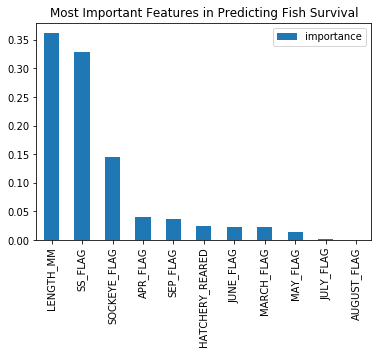

In [23]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar',title='Most Important Features in Predicting Fish Survival')